# Vector AutoRegression (VAR) Simulation
## Introduction

*Vector AutoRegression* (VAR) is a statistical model that captures the linear interdependencies among multiple time series. VAR models treat all variables in the system as endogenous, allowing for the analysis and forecasting of systems where variables mutually influence each other.

This approach is particularly useful for analyzing and forecasting systems where variables influence each other. In economics and finance, VAR models are commonly applied to study the dynamic impact of shocks in one variable on the entire system of variables. MIMIC, however, uses VAR models to simulate the dynamics of a microbiome system, where the abundances of different microbial species influence each other over time.

### VAR(1) Process

The `VARsim.py` script simulates data from a VAR(1) process, which is the simplest form of VAR model where each variable's current value is influenced by the immediately preceding values of all variables in the system. The general formula for a VAR(1) process with $ n $ variables is:

$$ X_t = A \cdot X_{t-1} + \epsilon_t $$

where:
- $ X_t $ is the vector of variables at time $ t $,
- $ A $ is the matrix of coefficients, capturing the influence of each variable's previous value on the current value of all variables in the system,
- $ \epsilon_t $ is the vector of error terms, assumed to be normally distributed with mean 0 and a specific standard deviation.

In the script, `generate_var1_data` method is used to simulate data based on the VAR(1) model parameters:

- `n_obs`: Number of observations to generate.
- `coefficients`: Coefficient matrix for the VAR(1) process. It should be a square matrix of shape $ (n, n) $.
- `initial_values`: Initial values for the process, a vector of shape $ (n,) $.
- `noise_stddev`: Standard deviation of the noise term.

This method generates a time series data set following the specified VAR(1) process, allowing for the exploration of dynamic relationships among variables.

### Visualization Methods

The script includes functions for visualizing the simulated data, making it easier to analyze the interdependencies and dynamics within the system. 

## Notebook Structure

This notebook will show how to simulate VAR models using the `VARsim.py` script, including specifying parameters directly in the code and importing from a JSON file. We will also explore various methods for visualizing the simulated data to derive insights into the modeled system's dynamics.

## Objective
The goal is to simulate VAR model dynamics using the `VARsim.py` class, visualize the simulated data, and understand the interactions within the VAR model with an example use-case. We aim to gain insights into the system's dynamics through simulation and visualization techniques.


### Example Usage of `VARsim.py` VAR Model Simulation
In this section, we will demonstrate the practical application of the VARsim.py class through a comprehensive example. Our goal is to provide you with a hands-on understanding of how to simulate Vector Autoregression (VAR) model dynamics, visualize the resulting data, and interpret the interactions between variables within the model. This example is designed to guide you step-by-step through the process, from setting up the simulation environment to analyzing the outcomes with visualization techniques.

### Importing Libraries

In [1]:
from mimic.model_simulate.VAR_sim import *

### Creating a VAR simulation model

In this section, we are just going to create a VAR simulation model class and print the parameters it is initialized with.

In [2]:
model = VARSimulator()
model.print_parameters()

Model: VAR
{
    "n_obs": null,
    "coefficients": null,
    "initial_values": null,
    "noise_stddev": null,
    "output": null
}


We can see that the initial parameters are set to `null`. If we create a VAR model or a gMLV model, the initial parameters are going to be different for each model. However, a VAR model is going to have the following parameters:
- **n_obs**: Number of observations to generate.
- **coefficients**: Coefficient matrix for the VAR(1) process. It should be a square matrix of shape (n, n).
- **initial_values**: Initial values for the process, a vector of shape (n,).
- **noise_stddev**: Standard deviation of the noise term.
- **output**: This is a string that specifies the output format. It can be either `show`, `save` or `both`. If it is `show`, the plot is going to be displayed on the screen. If it is `save`, the plot is going to be saved in the current working directory. If it is `both`, the plot is going to be displayed on the screen and saved in the current working directory.

In the following section, we are going to specify the parameters we want to use in our simulation.

### Running the Simulation with Specified Parameters
In this section, we'll demonstrate how to run a VAR simulation using specified parameters directly in the code. This approach provides a quick and flexible way to test different configurations.

In [3]:
# Specify the simulation parameters directly

# Number of observations to simulate. In this example we simulate 100 observations.
n_obs = 100

# Coefficients for the VAR model represented as a matrix. In this example, the VAR model has 2 lags and 2 variables.
coefficients = [[0.8, -0.2], [0.3, 0.5]]

# Initial values for the VAR model, represented as a matrix. In this example, the VAR model has 2 variables so the initial values are a 2x1 matrix.
initial_values = [[1], [2]]

# Standard deviation of the noise term in the VAR model. In this example, the noise term has a standard deviation of 1.
noise_stddev = 1.0

# Determines how the output should be handled. If 'show', the output is printed to the console. If 'save', the output is saved to a file. If 'none', the output is not printed or saved. If 'both', the output is printed and saved.
output = 'show'

In [4]:
# now we can set the parameters for our VAR model created previously
model.set_parameters(n_obs=n_obs, coefficients=coefficients,
                     initial_values=initial_values, noise_stddev=noise_stddev, output=output)

Using the following parameters for VAR simulation: {'n_obs': 100, 'coefficients': [[0.8, -0.2], [0.3, 0.5]], 'initial_values': [[1], [2]], 'noise_stddev': 1.0, 'output': 'show'}


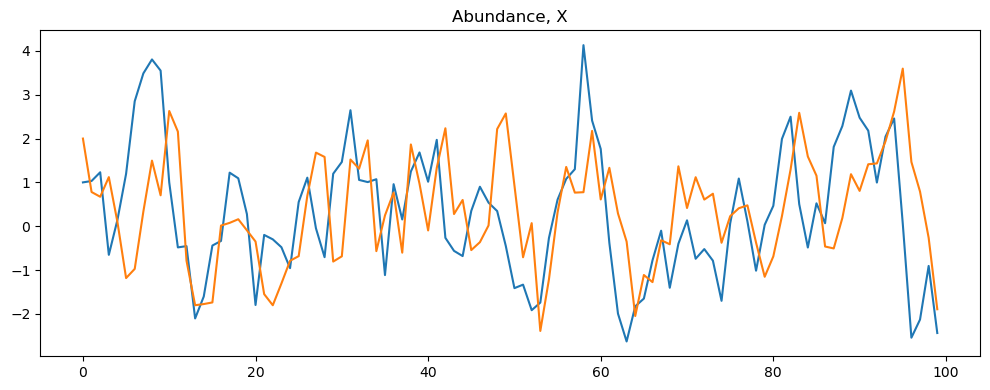

In [5]:
# Simulate the data. The data is simulated by calling the run method of the VARSimulator object and passing the name of the simulation method as an argument. In this example, the simulation method is 'VARsim'.
model.simulate("VARsim")

In [6]:
# The simulated data is stored in the VARSimulator object and can be accessed using the data attribute of the object.
model.data

array([[ 1.        ,  2.        ],
       [ 1.03207168,  0.78048085],
       [ 1.23102623,  0.67202477],
       [-0.65398261,  1.12030256],
       [ 0.14695817,  0.09246288],
       [ 1.19591062, -1.18370642],
       [ 2.85218848, -0.97430587],
       [ 3.48711125,  0.33241267],
       [ 3.80578565,  1.49668428],
       [ 3.55089639,  0.70495926],
       [ 0.99875907,  2.62921359],
       [-0.48386051,  2.15914613],
       [-0.4546983 , -0.78643836],
       [-2.10498374, -1.80371966],
       [-1.60494301, -1.77667352],
       [-0.44170931, -1.73990153],
       [-0.33586816,  0.01439584],
       [ 1.22196091,  0.07608852],
       [ 1.09322281,  0.15904075],
       [ 0.27706905, -0.09370446],
       [-1.79814819, -0.35034985],
       [-0.1992955 , -1.55047865],
       [-0.300041  , -1.80403344],
       [-0.48011328, -1.30729269],
       [-0.95752527, -0.78904875],
       [ 0.5510238 , -0.68325063],
       [ 1.10807745,  0.69276304],
       [-0.04740313,  1.67962166],
       [-0.70718126,

In [7]:
# The simulated data can be saved to a file by calling the save method of the VARSimulator object and passing the name of the file as an argument. In this example, the file is saved as 'simulated_data.csv'.
model.save_data(r'examples\examples-sim-VAR\simulated_data.csv')

In [8]:
# You can also access the simulation parameters using the print_params method of the VARSimulator object.
model.print_parameters()

Model: VAR
{
    "n_obs": 100,
    "coefficients": [
        [
            0.8,
            -0.2
        ],
        [
            0.3,
            0.5
        ]
    ],
    "initial_values": [
        [
            1
        ],
        [
            2
        ]
    ],
    "noise_stddev": 1.0,
    "output": "show"
}


In [9]:
# as well as the parameters
model.save_parameters(r'examples\examples-sim-VAR\simulated_parameters.json')

Model: VAR
{
    "n_obs": 100,
    "coefficients": null,
    "initial_values": [
        [
            1
        ],
        [
            2
        ]
    ],
    "noise_stddev": null,
    "output": "show"
}
Using the following parameters for VAR simulation: {'n_obs': 100, 'coefficients': [[0.8, -0.2], [0.3, 0.5]], 'initial_values': [[1], [2]], 'noise_stddev': 1, 'output': 'show'}


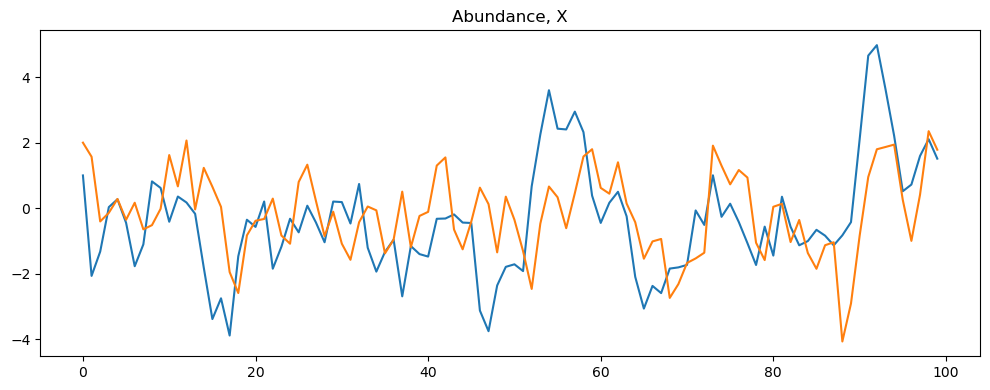

Model: VAR
{
    "n_obs": 100,
    "coefficients": [
        [
            0.8,
            -0.2
        ],
        [
            0.3,
            0.5
        ]
    ],
    "initial_values": [
        [
            1
        ],
        [
            2
        ]
    ],
    "noise_stddev": 1,
    "output": "show"
}


In [10]:
# If no coefficients are specified, the default values are used
# for example, in this example the noise and coefficients are not specified


simulator = VARSimulator()
simulator.set_parameters(n_obs=n_obs, initial_values=[[1], [2]], output='show')


simulator.print_parameters()

simulator.simulate("VARsim")

simulator.print_parameters()

The simulator can also be run using parameters saved in a json file, which is useful for managing and reusing configurations, especially if the matrices are big. We'll demonstrate this approach in the next section.

For example, you could specify the parameters in the following way:

```JSON
{
    "n_obs": 97,
    "coefficients": [
        [
            0.8,
            -0.2,
            0.3
        ],
        [
            0.3,
            0.5,
            -1.0
        ],
        [
            0.2,
            -0.1,
            0.4
        ]
    ],
    "initial_values": [
        [
            1
        ],
        [
            2
        ],
        [
            0
        ]
    ],
    "noise_stddev": 1.2,
    "output": "both"
}
```

Model: VAR
{
    "n_obs": 97,
    "coefficients": [
        [
            0.8,
            -0.2,
            0.3
        ],
        [
            0.3,
            0.5,
            -1.0
        ],
        [
            0.2,
            -0.1,
            0.4
        ]
    ],
    "initial_values": [
        [
            1
        ],
        [
            2
        ],
        [
            0
        ]
    ],
    "noise_stddev": 1.2,
    "output": "both"
}
Using the following parameters for VAR simulation: {'n_obs': 97, 'coefficients': [[0.8, -0.2, 0.3], [0.3, 0.5, -1.0], [0.2, -0.1, 0.4]], 'initial_values': [[1], [2], [0]], 'noise_stddev': 1.2, 'output': 'both'}


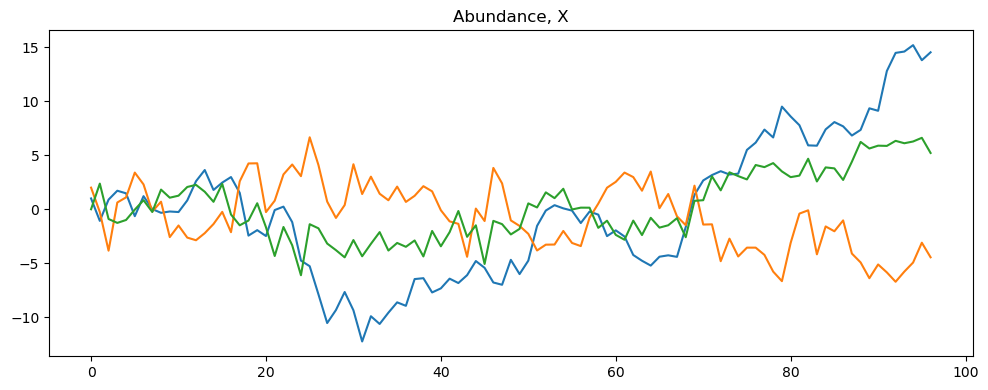

In [11]:
model.read_parameters(r'examples\examples-sim-VAR\parameters2.json')
model.print_parameters()

model.simulate("VARsim")

The script also contains different methods for visualizing the simulated data, including plotting the time series of each variable in a different plot.

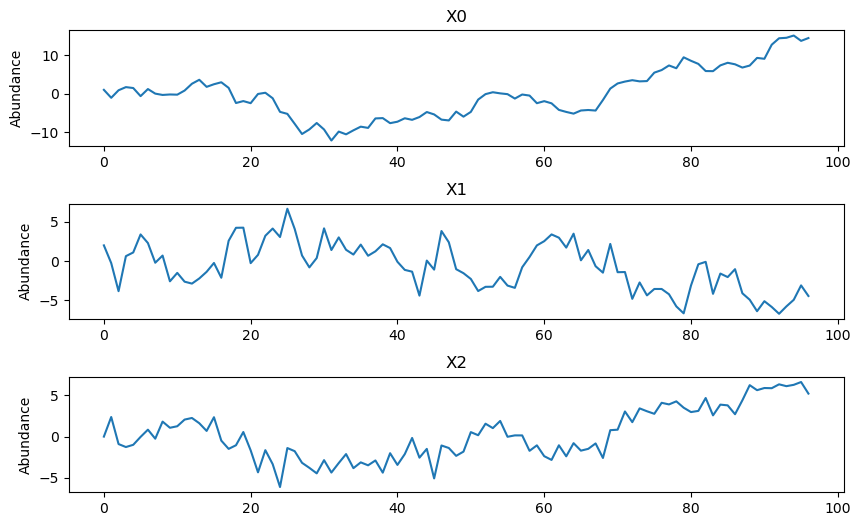

In [13]:
model.make_plot(model.data)

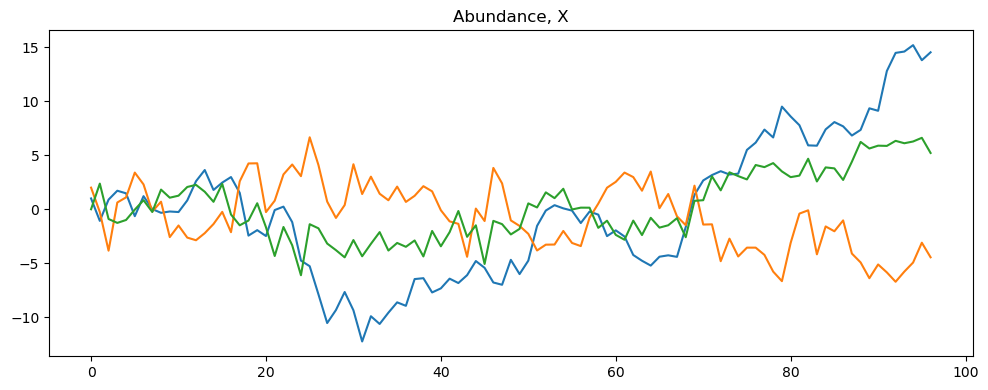

In [14]:
model.make_plot_overlay(model.data)